<a href="https://colab.research.google.com/github/sarnavadatta/Predictive-Modelling/blob/main/Employee_Attrition_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!ls '/content/drive/My Drive/DS projects/Attrition Rate/'

Employee_Attrition_Prediction.ipynb  HR-Employee-Attrition.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/My Drive/DS projects/Attrition Rate/HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


**EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [ ]:
df_categorical = df.select_dtypes(['object'])
df_categorical.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


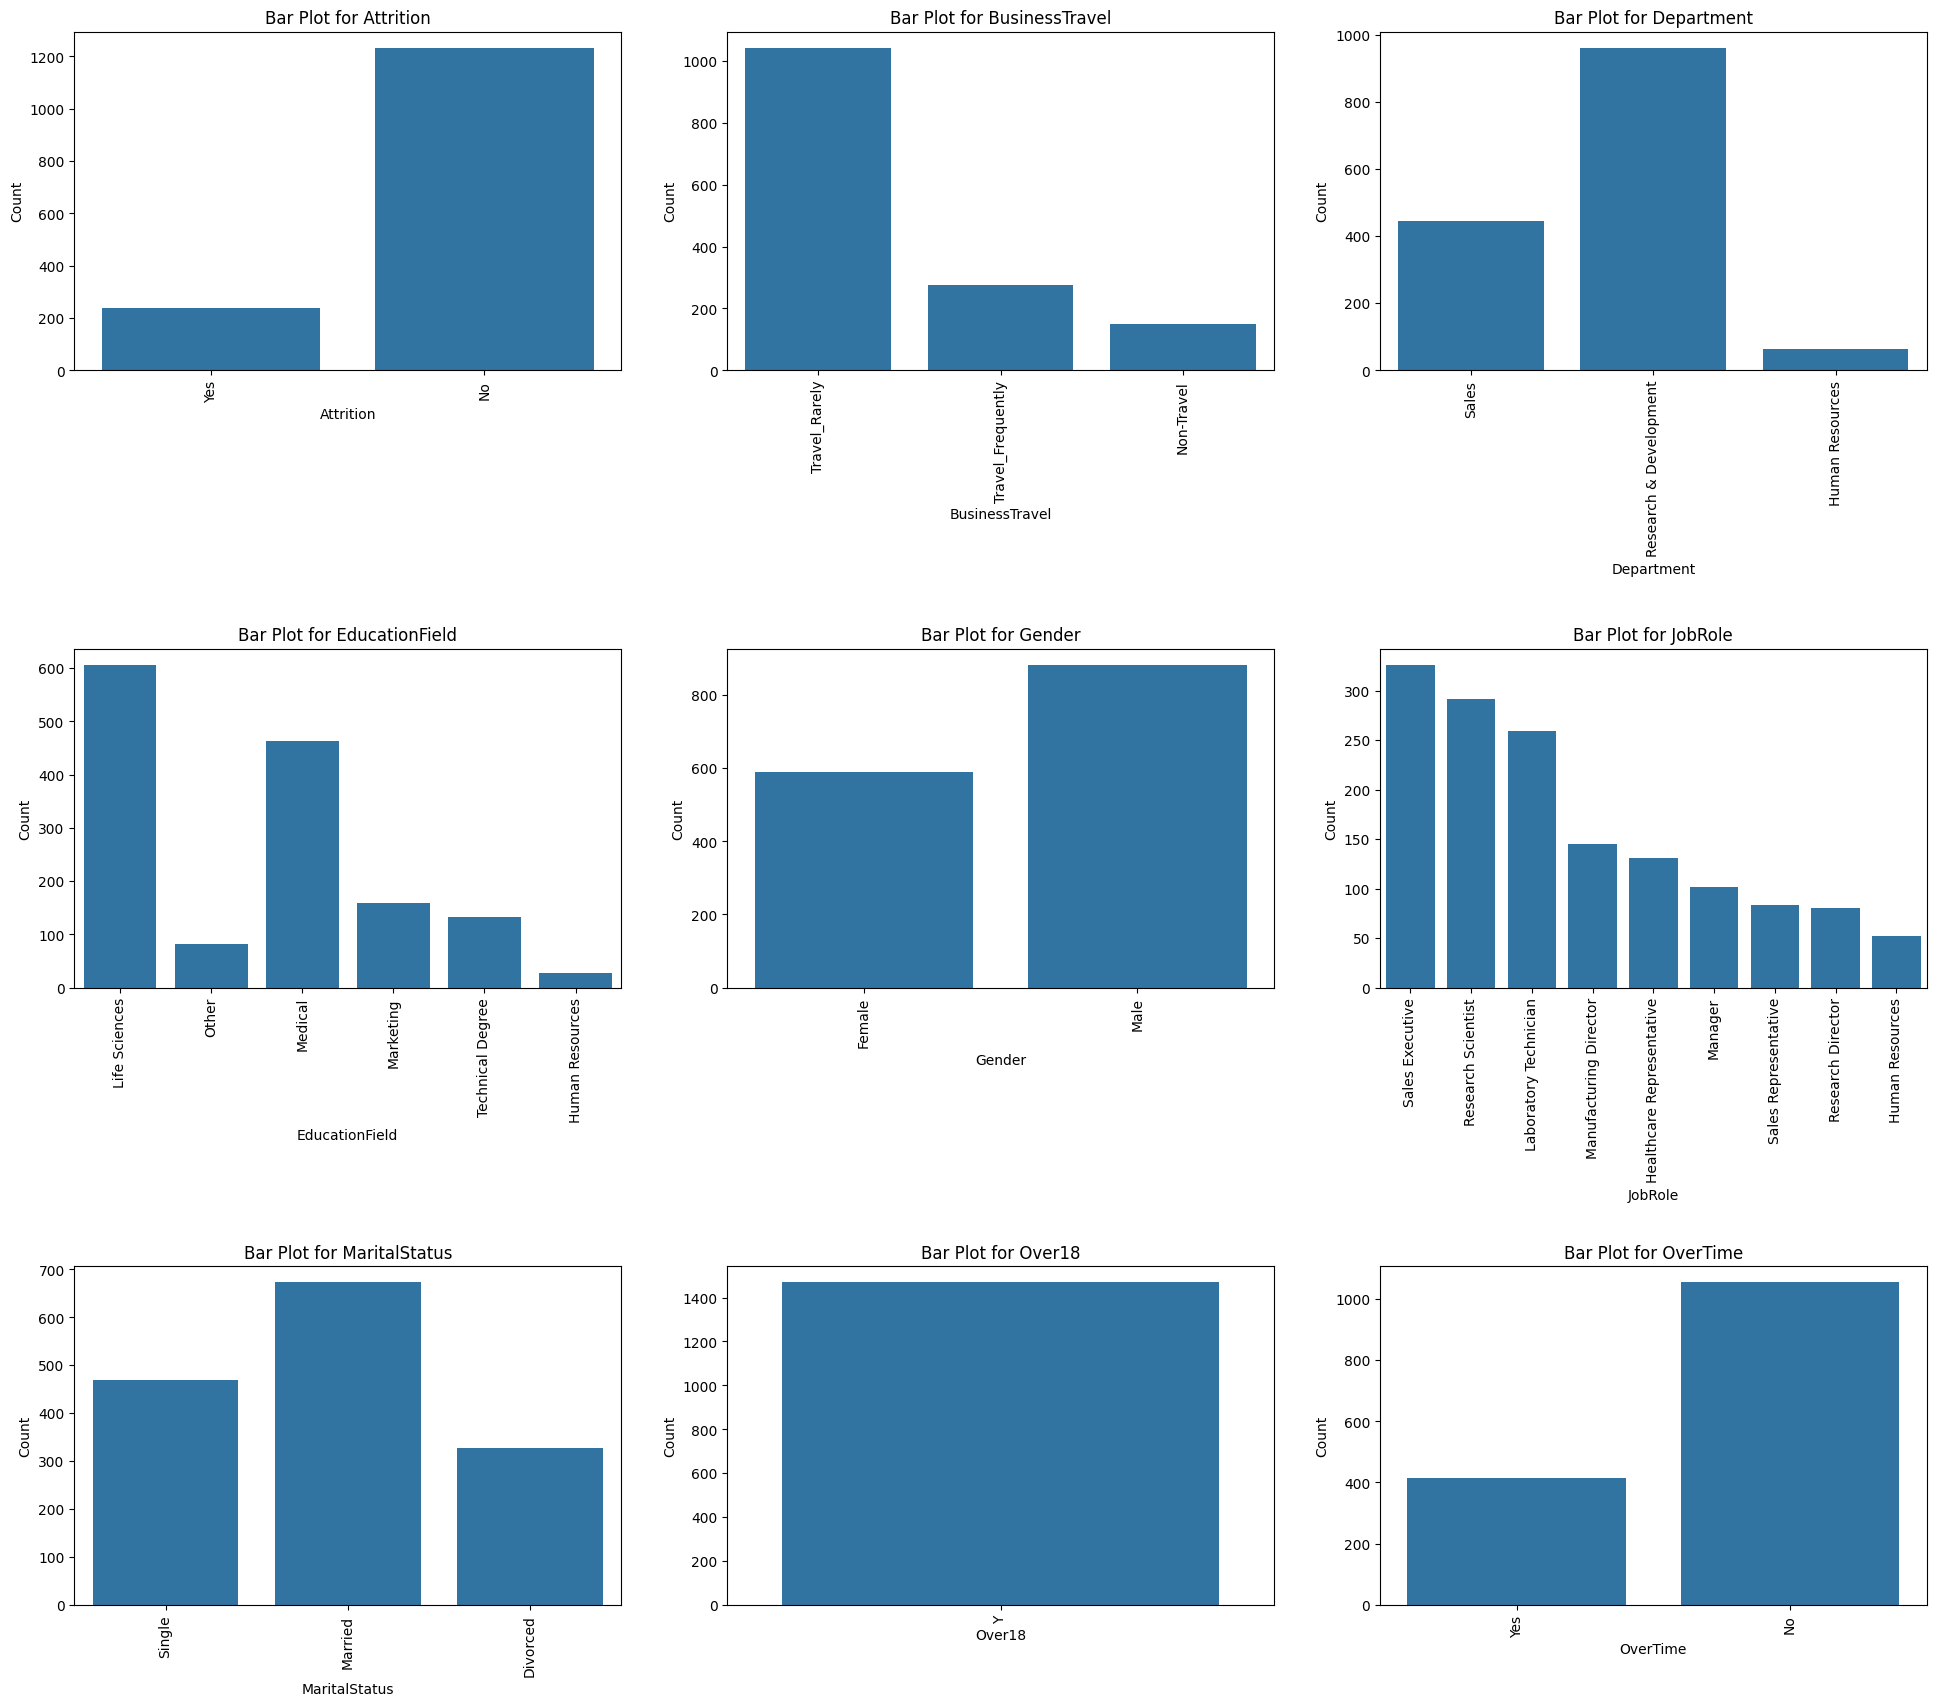

In [ ]:
# Plotting categorical features
plt.figure(figsize=(20, 60))
for i, col in enumerate(df_categorical.columns):
    plt.subplot(10, 3, i + 1)
    sns.countplot(x=col, data=df_categorical)
    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
    plt.title(f"Bar Plot for {col}")
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout(pad=3) # Add padding between subplots
plt.show()


In [ ]:
df_numerical = df.select_dtypes(['int'])
df_numerical.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


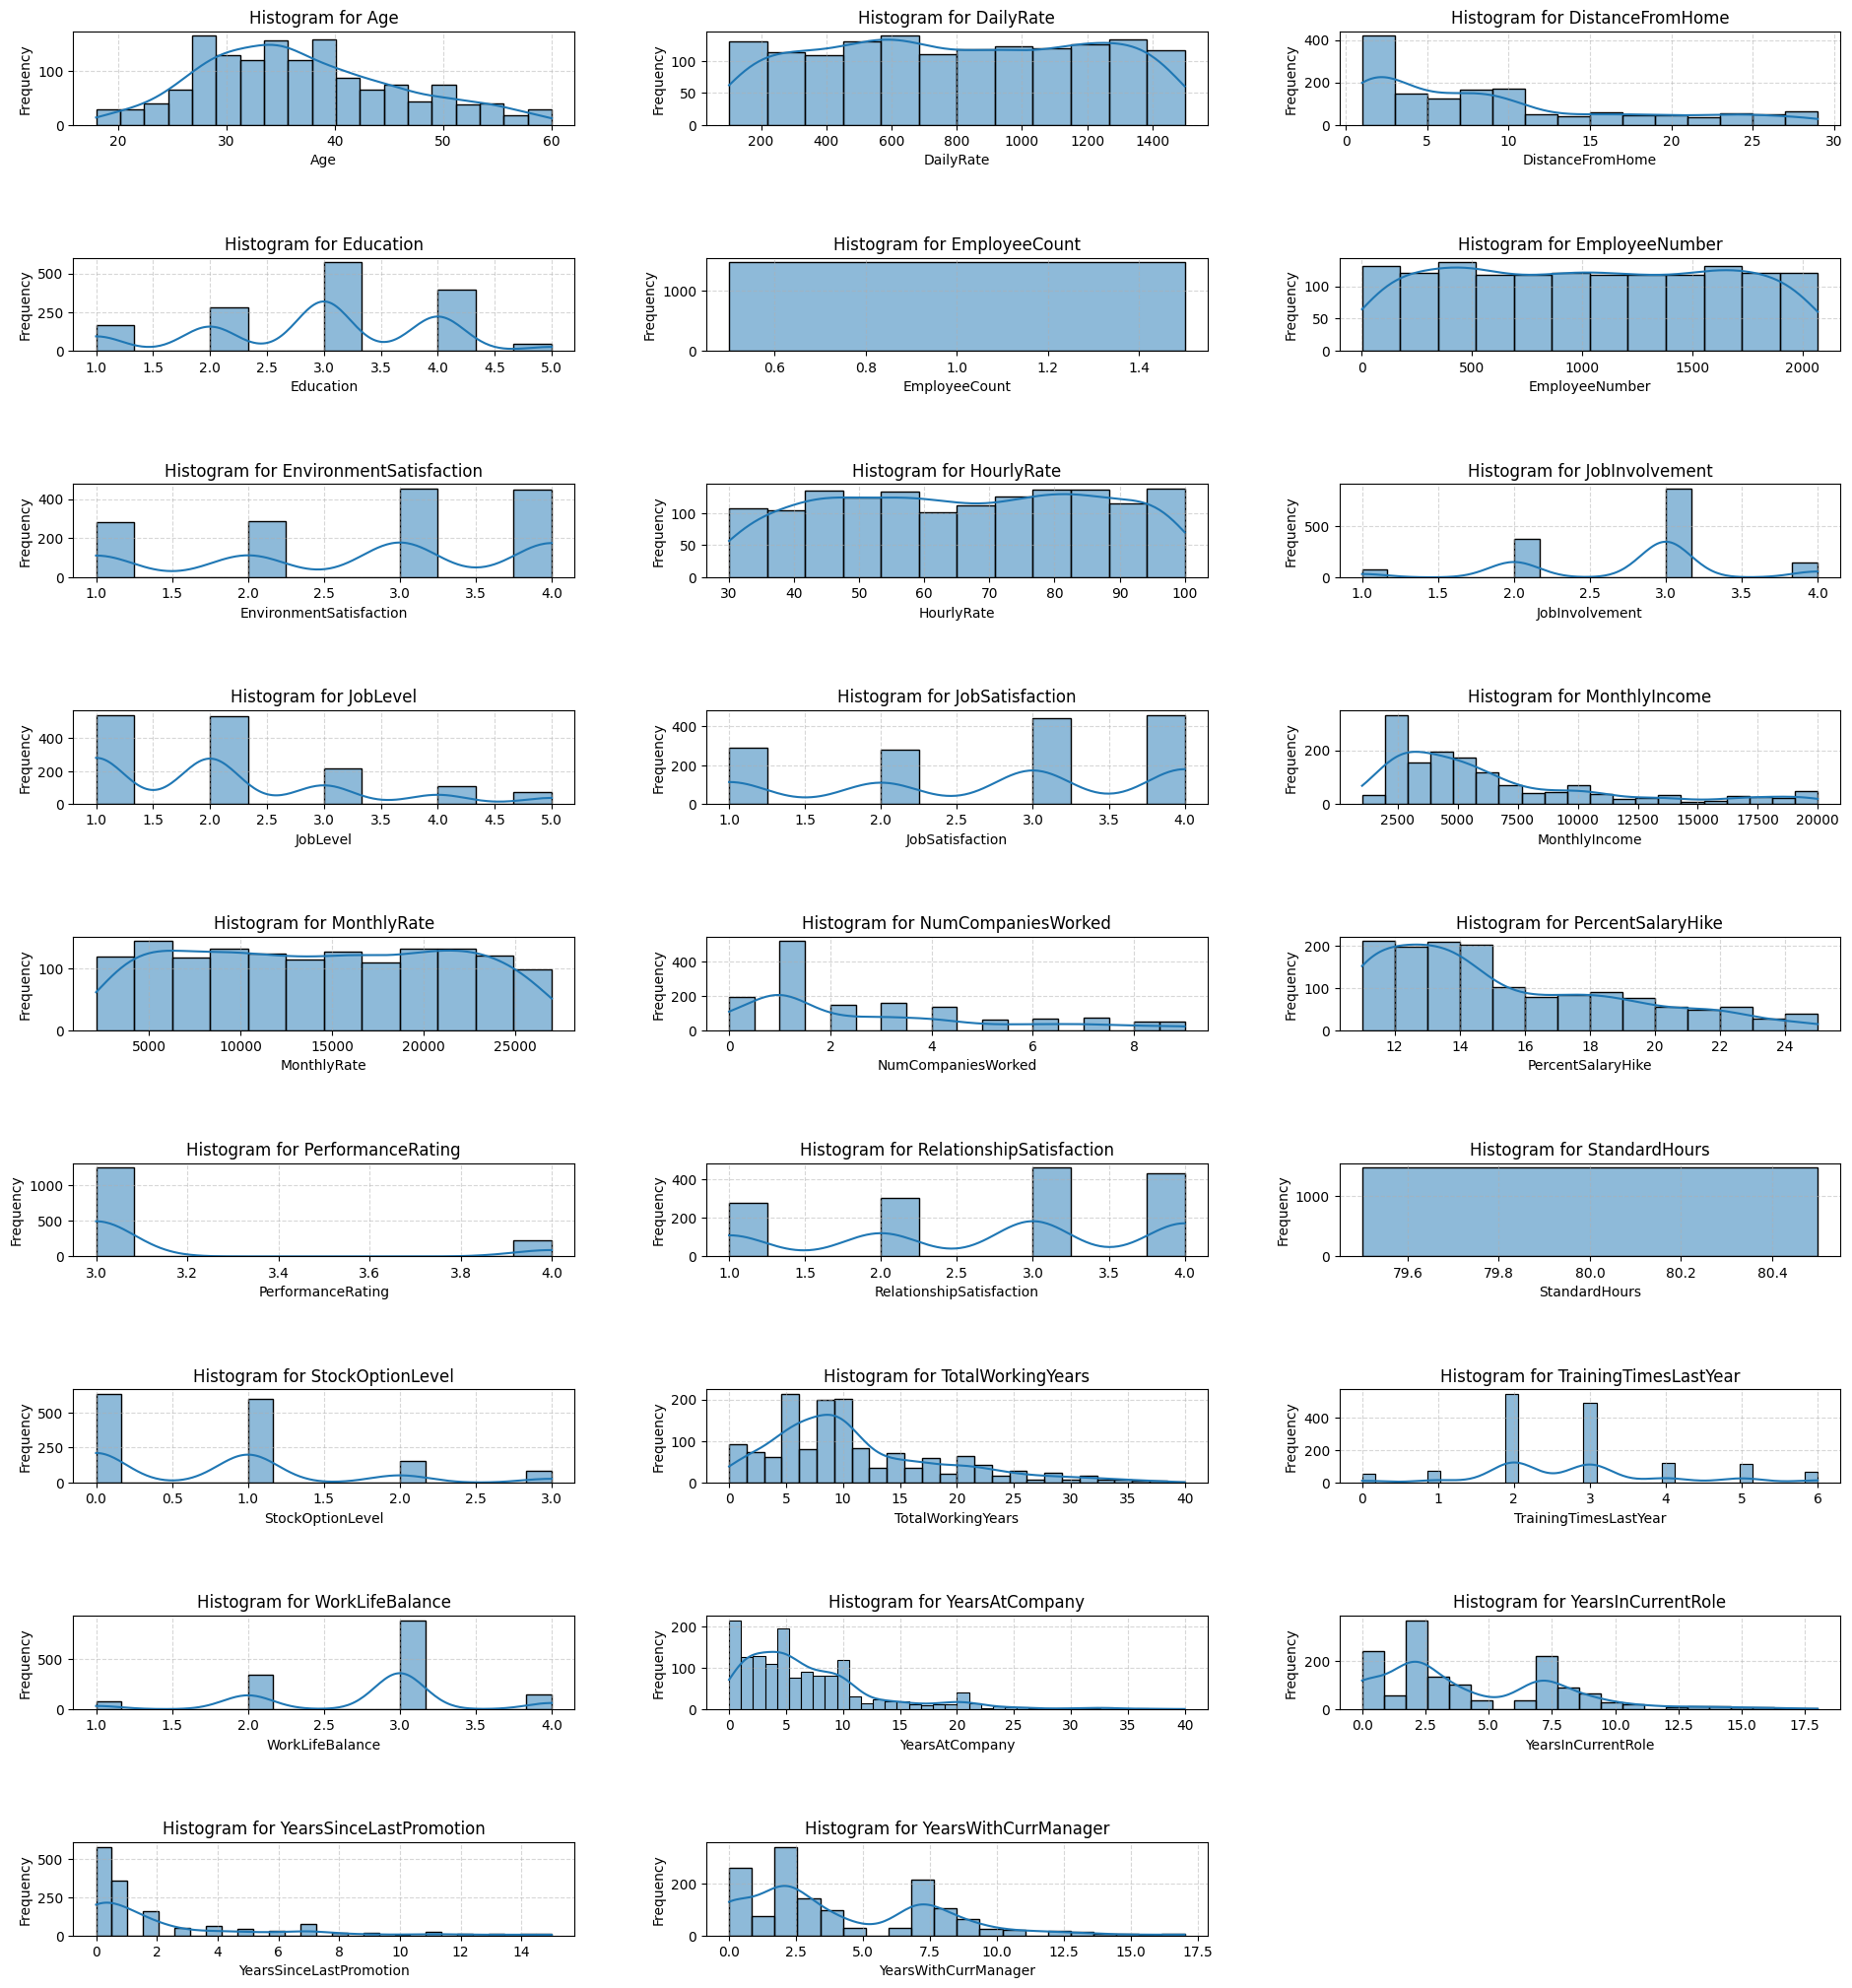

In [ ]:
# prompt: plot the histogram for all the columns in df_numerical dataframe. There should be 4 graphs in each column. The axis names should be visible. Sufficient gaps between two graphs.

plt.figure(figsize=(20, 60))
for i, col in enumerate(df_numerical.columns):
    plt.subplot(len(df_numerical.columns), 3, i + 1) # Create subplots in a single column
    sns.histplot(df_numerical[col], kde=True) # Using seaborn for better histograms
    plt.title(f"Histogram for {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.5) # Adding a grid for better readability

plt.tight_layout(pad=5.0) # Increased padding for better spacing
plt.show()


**Train-Test Split & Model Training**

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['Attrition'], axis=1)
y = df['Attrition'].map({'No': 0, 'Yes': 1})

In [ ]:
y.value_counts()

,count
Attrition,
0,1233
1,237


In [ ]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
X_train.shape, X_test.shape

((1102, 34), (368, 34))

In [ ]:
# Create Column Transformer with 3 types of transformers
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
OHE_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
         ("OneHotEncoder", OHE_transformer, cat_features),
          ("StandardScaler", numeric_transformer, num_features)
    ]
)

preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfacti...
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object'))])

In [ ]:
## applying Trnsformation in training(fit_transform)
X_train=preprocessor.fit_transform(X_train)

## apply tansformation on test(transform)
X_test=preprocessor.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve

In [ ]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost":AdaBoostClassifier(),
    "Xgboost":XGBClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))

    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))



    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))


    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.8893
- F1 score: 0.8780
- Precision: 0.7913
- Recall: 0.4815
- Roc Auc Score: 0.7276
----------------------------------
Model performance for Test set
- Accuracy: 0.9049
- F1 score: 0.8959
- Precision: 0.7097
- Recall: 0.4583
- Roc Auc Score: 0.7151


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8016
- F1 score: 0.8087
- Precision: 0.2807
- Recall: 0.3333
- Roc Auc Score: 0.6026


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8723
- F1 score: 0.8285
- Precision: 0.5714
- Recall: 0.0833
- Roc Auc Score: 0.5370


Gradient Boost
Model performance for Training se

*Adaboost + GradientBoosting*

In [ ]:
ada_clf = AdaBoostClassifier(GradientBoostingClassifier())
ada_clf.fit(X_train, y_train)

# Make predictions
y_train_pred = ada_clf.predict(X_train)
y_test_pred = ada_clf.predict(X_test)

# Training set performance
model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


# Test set performance
model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


print('Model performance for Training set')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:.4f}'.format(model_train_f1))

print('- Precision: {:.4f}'.format(model_train_precision))
print('- Recall: {:.4f}'.format(model_train_recall))
print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))



print('----------------------------------')

print('Model performance for Test set')
print('- Accuracy: {:.4f}'.format(model_test_accuracy))
print('- F1 score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))


Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8750
- F1 score: 0.8564
- Precision: 0.5417
- Recall: 0.2708
- Roc Auc Score: 0.6182


In [ ]:
# Hyperparameter Training for Gradient Boosting Parameter
gradient_params={"loss": ['log_loss','deviance','exponential'],
             "criterion": ['friedman_mse','squared_error','mse'],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 300, 400, 500],
              "max_depth": [5, 8, 10, 15, None]
                }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Models list for Hyperparameter tuning
randomcv_models = [("GradientBoost", GradientBoostingClassifier(), gradient_params)]


model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for GradientBoost -------------------
{'n_estimators': 500, 'min_samples_split': 20, 'max_depth': 5, 'loss': 'log_loss', 'criterion': 'squared_error'}


In [ ]:
Best_fit_model=GradientBoostingClassifier(n_estimators=500,
                                          min_samples_split=20,
                                          max_depth=5,
                                          loss='log_loss',
                                          criterion='squared_error')
model = Best_fit_model
model.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Training set performance
model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


# Test set performance
model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


print('Model performance for Training set')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:.4f}'.format(model_train_f1))

print('- Precision: {:.4f}'.format(model_train_precision))
print('- Recall: {:.4f}'.format(model_train_recall))
print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))



print('----------------------------------')

print('Model performance for Test set')
print('- Accuracy: {:.4f}'.format(model_test_accuracy))
print('- F1 score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))


Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8804
- F1 score: 0.8665
- Precision: 0.5714
- Recall: 0.3333
- Roc Auc Score: 0.6479


<Axes: >

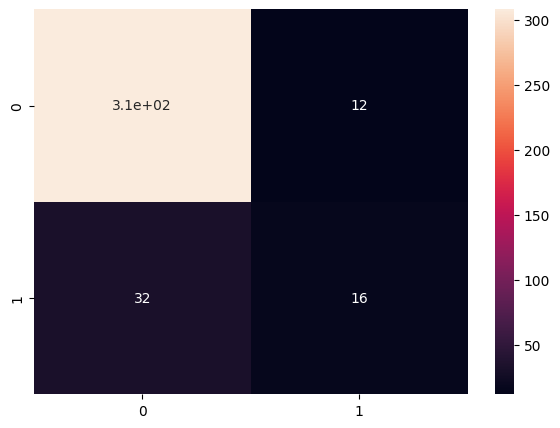

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_GBC = confusion_matrix(y_test, y_test_pred)

#HeatMap for Confusion Matrix
plt.figure(figsize=(7,5))
plt.rcParams.update({'font.size': 10})
sns.heatmap(cm_GBC,annot=True)